<a href="https://colab.research.google.com/github/joyeeta-19/image-classification-using-distributed-SVM/blob/main/Image_Classification_using_simple_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5nfXPELSsa1kzEei1pZc7xp4a20Cvaa4-a9aUHk8oicU_k-GgevOw
Mounted at /content/drive


#inserting the data

In [2]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dir = "/content/drive/MyDrive/lsdp/damage/data1a/training"
classes = ['damage','nodamage']
data = []
vector =[]
categories=[]

for category in classes:
  path = os.path.join(dir,category)
  label= classes.index(category)
  
  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    car_img=cv2.imread(imgpath,0)
    try:
      car_img = cv2.resize(car_img,(16,16))
      image = np.array(car_img).flatten()

      data.append([image,label])
      vector.append(image)
      categories.append(label)
    except Exception as e:
      pass

print(len(data))

1840


In [8]:
# df_read = pd.read_csv('/content/drive/MyDrive/lsdp_dataset/imgvectors.csv')
# df_read.head()


df = pd.DataFrame()

for i in range(len(vector)):
  df[i]=vector[i]

df_final=df.T

df_final.insert(0, 'label', categories)
df_final.head()
#df.to_csv('/content/drive/MyDrive/lsdp_dataset/imgvectors_final.csv')

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0,242,248,212,243,172,226,213,225,219,210,176,143,116,79,123,235,242,244,252,248,228,233,224,134,184,215,117,174,149,121,82,157,243,248,250,246,238,234,231,...,70,77,91,107,112,120,124,159,90,84,85,86,81,85,88,94,93,95,90,98,107,121,142,132,121,97,94,94,96,98,99,92,105,110,105,106,117,119,123,129
1,0,154,212,111,71,97,65,136,73,77,76,68,70,249,251,251,251,79,74,66,59,36,104,122,73,76,76,70,62,63,223,151,198,85,99,87,97,70,94,49,...,85,40,3,110,133,123,144,153,97,111,94,111,100,123,114,120,119,120,118,132,141,126,141,145,160,150,124,118,113,112,121,99,121,116,119,128,123,134,130,121
2,0,174,72,200,197,198,139,137,132,127,103,126,133,132,220,212,110,122,160,197,193,205,218,141,120,107,92,122,132,120,95,209,212,169,144,188,173,199,207,207,...,101,94,90,89,90,87,127,50,92,84,91,29,25,30,35,51,86,91,83,77,76,36,45,54,96,91,59,59,57,41,42,36,29,30,33,35,39,44,53,59
3,0,220,216,250,254,177,169,237,236,243,242,101,120,134,83,64,102,250,224,231,132,148,182,151,129,172,221,218,197,220,105,158,73,235,156,128,136,112,111,113,...,87,89,91,122,93,117,95,59,43,50,89,140,106,71,72,77,81,86,93,93,107,50,44,55,53,54,70,73,79,71,97,78,85,87,91,96,40,32,37,45
4,0,35,48,61,28,78,72,58,104,23,12,46,69,21,41,10,65,60,47,59,53,31,68,30,37,29,33,26,15,28,78,17,27,126,148,165,111,105,110,108,...,194,196,196,196,196,196,198,196,152,145,148,167,188,189,193,194,196,197,197,196,198,198,200,195,158,158,157,146,179,191,200,195,196,198,197,198,201,199,202,201


#reading from csv file

In [10]:
df_second = pd.DataFrame()
df_second['vectors'] = data
#df_second.to_csv('/content/drive/MyDrive/lsdp_dataset/imgvectors_final2.csv')
df_second.head()

,vectors
0,"[[242, 248, 212, 243, 172, 226, 213, 225, 219,..."
1,"[[154, 212, 111, 71, 97, 65, 136, 73, 77, 76, ..."
2,"[[174, 72, 200, 197, 198, 139, 137, 132, 127, ..."
3,"[[220, 216, 250, 254, 177, 169, 237, 236, 243,..."
4,"[[35, 48, 61, 28, 78, 72, 58, 104, 23, 12, 46,..."


# Performing PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ft_arr = np.array(output)

ft_t=ft_arr.transpose().reshape(3,-1)

# ft_t = ft_arr.transpose().reshape(3,-1)
print(ft_t.shape)
# x = StandardScaler().fit_transform(ft_t)
# print(x)
# pca = PCA(n_components=2)
# pc = pca.fit_transform(x)
# pDf = pd.DataFrame(data = pc)
# pDf.head()


(3, 196608)


In [11]:
import random

dataread = df_second['vectors']

random.shuffle(dataread)
features = []
labels = []


for feature,label in dataread:
  features.append(feature)
  labels.append(label)

xtrain, xtest, ytrain, test = train_test_split(features,labels,test_size=0.25)

#!!!!!!!!!!!Training the svm model!!!!!!!!!! using svm from sklearn

In [19]:
from sklearn.svm import SVC

model = SVC(C=10,kernel='poly', gamma='auto')
model.fit(xtrain,ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
prediction = model.predict(xtest)

accuracy = model.score(xtest,test)
print("accuracy: " ,accuracy) 

accuracy:  0.5782608695652174


Confusion matrix, without normalization
[[134  89]
 [105 132]]
Normalized confusion matrix
[[0.60089686 0.39910314]
 [0.44303797 0.55696203]]


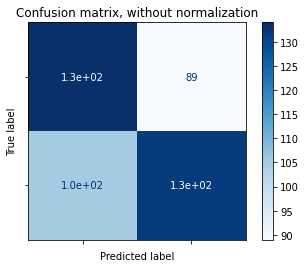

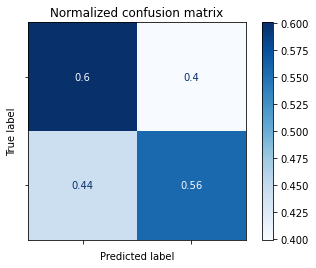

In [29]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, xtest, test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [44]:
from sklearn.model_selection import cross_val_predict
ytrain_pred = cross_val_predict(model, xtrain, ytrain, cv=3)
from sklearn.metrics import classification_report
 
# # Constructing the confusion matrix.
# from sklearn.metrics import confusion_matrix
# confusion_matrix(ytrain, ytrain_pred)
# from sklearn.metrics import precision_score, recall_score
# precision_score(ytrain, ytrain_pred)
# recall_score(ytrain, ytrain_pred)
target_names = ['damage', 'nodamage']
print(classification_report(ytrain, ytrain_pred, target_names=target_names))

              precision    recall  f1-score   support

      damage       0.64      0.64      0.64       722
    nodamage       0.60      0.60      0.60       658

    accuracy                           0.62      1380
   macro avg       0.62      0.62      0.62      1380
weighted avg       0.62      0.62      0.62      1380



Prediction is:  nodamage
[ 20 239 118 117 117 110 109 106  99  96  94  92  94  94 105 123  34 213
 180 216 212 218 190 203 230 229 221 214 200 183 175 202   6 226 170 129
 171 191 171 124 217 224 226 151 171 165 172 180  12  79 103 160 188  90
 132  51 102 109 104 179 160 165 124 216  22 220 233 139 192  95 107 196
 181 205 209 148 151 144 198 185  57 222 132 138 182 201 114 223  77 204
 208 131 141 241 253 175  84 199 200 182 150 138 188 163  53 190 173 122
 116 168  42  53 105 125 153 209 234 178 173 122 139 138 132 128 100 148
  44 213 104 106 110 114 117 189 212 225 237 159 163 150 141 142 198 200
 114 110 100  95 100 103 102 108 134 203 206 198 195 191 191 188 122 129
 145 123  96  90  79  89 104  80  98  99 105 110 123 138 127 129 137 132
  32   9  40  73  78  75  75  79  89  88  95 100 139 137 126 117  34  21
  10  12  42  36  76  70  66  66  70  74 124 123 114  69  32  30  22   8
  16  19  13  24  44  41  40  56 121 133 110  67  47  26  34  40  20  16
  14  11  16  23   4  13  

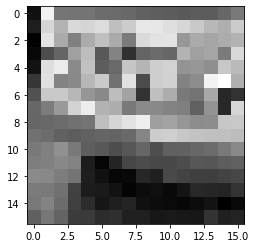

In [46]:
categories = ['damage','nodamage']
print("Prediction is: ",categories[prediction[0]])

grbg= xtest[0].reshape(16,16)
plt.imshow(grbg,cmap="gray")
print(xtest[0])